In [11]:
from transformers import VisionEncoderDecoderModel,ViTImageProcessor,AutoTokenizer
import torch
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [12]:
model=VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor=ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer=AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [13]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [33]:
max_length=16
num_beams=4
gen_kwargs={"max_length": max_length,"num_beams": num_beams}

In [43]:
from PIL import Image

def predict_step(image_paths):
    images=[]
    for image_path in image_paths:
        i_image=Image.open(image_path)
        if i_image.mode !="RGB":
            i_image=i_image.convert(mode="RGB")
            
        images.append(i_image)
    pixel_values=feature_extractor(images=images,return_tensors="pt").pixel_values
    pixel_values=pixel_values.to(device)
    
    output_ids=model.generate(pixel_values,**gen_kwargs)
    
    preds=tokenizer.batch_decode(output_ids,skip_special_tokens=True)
    preds=[pred.strip() for pred in preds]
    return preds

In [50]:
predict_step([r'D:\partiise section\images\kids.jpg'])

['a young boy sitting at a table eating a piece of fruit']

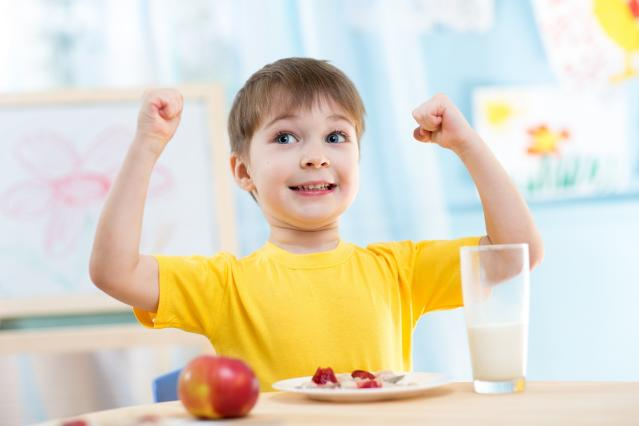

In [45]:
from IPython.display import Image
# Specify the image file path
image_path =r'D:\partiise section\images\kids.jpg'
# Display the image
Image(filename=image_path)

In [51]:
import os
from PIL import Image

def predict_folder_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    image_paths = [os.path.join(folder_path, f) for f in image_files]
    
    # Use the existing predict_step function with the list of image paths
    return predict_step(image_paths)

    # Print predicted captions with numbering
    for i, caption in enumerate(predicted_captions, start=1):
        print(f"{i}. {caption}")

    return predicted_captions


# Example usage:
folder_path = r'D:\partiise section\images'

predicted_captions = predict_folder_images(folder_path)
print(predicted_captions)


['a motorcycle parked on the side of a road', 'a black pickup truck sitting on top of a lush green hillside', 'a little girl standing next to a brown and white dog', 'young men standing next to each other on a tennis court', 'flowers in a vase on a sunny day', 'a man and a dog sitting in the grass', 'a young boy sitting at a table eating a piece of fruit']


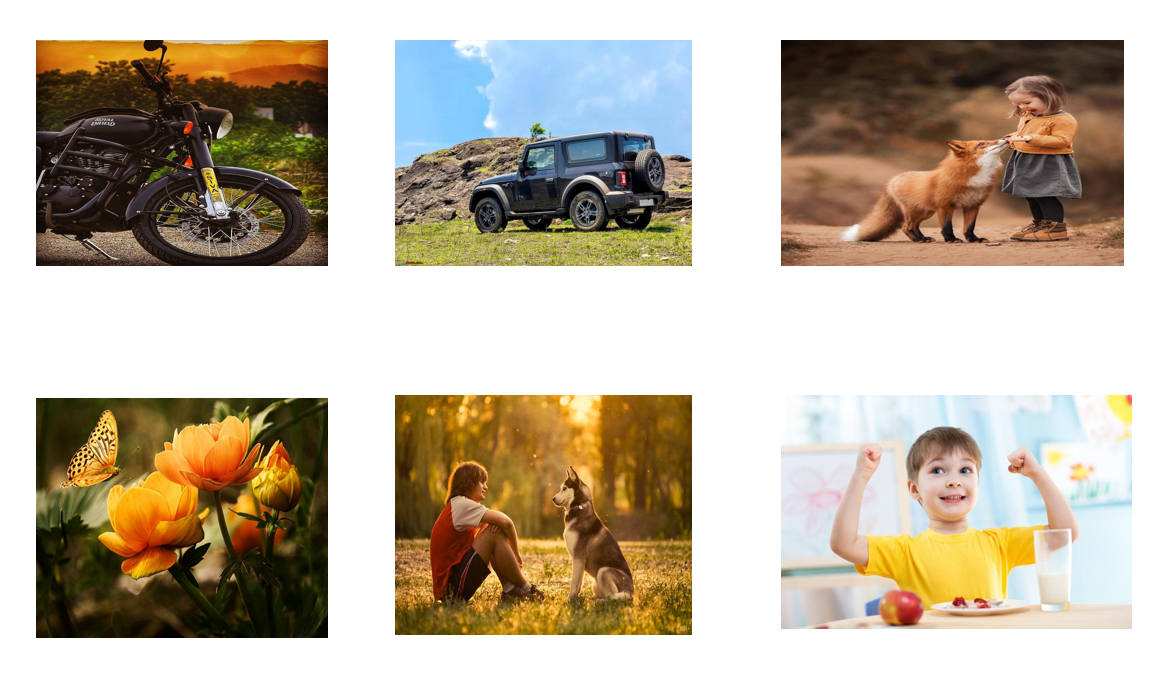

In [23]:
from IPython.display import Image

# Specify the image file path
image_path =r"C:\Users\RAHUL\Pictures\Screenshots\Screenshot 2024-04-05 123640.png"

# Display the image
Image(filename=image_path)


In [47]:
import os

def predict_folder(folder_path):
    images = []

    # Iterate over all files in the specified folder
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Filter image files
            image_path = os.path.join(folder_path, filename)
            i_image = Image.open(image_path)
            if i_image.mode != "RGB":
                i_image = i_image.convert(mode="RGB")
            images.append(i_image)

    if not images:
        print(f"No valid image files found in the folder: {folder_path}")
        return []

    # Process images using the ViTImageProcessor
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate captions for each image
    output_ids = model.generate(pixel_values, **gen_kwargs)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]

    # Map each caption to its corresponding image filename
    image_captions = dict(zip(os.listdir(folder_path), preds))

    return image_captions

# Example usage:
folder_path = r'D:\partiise section\Sample'
image_captions = predict_folder(folder_path)

# Print the predicted captions for each image
for filename, caption in image_captions.items():
    print(f"Image '{filename}': {caption}")

Image 'Bird (1).png': a bird that is flying in the air
Image 'birds22.png': a flock of seagulls flying in the sky
Image 'birds_PNG32.png': a black and white bird flying in the air
Image 'flower (1).png': a small yellow flower sitting on top of a flower pot
Image 'nature.png': a tree in the middle of a grassy field
Image 'Save-Earth-Free-PNG-Image.png': a plant that is growing in the middle of a tree
Image 'sky.png': a cloudy sky with a few clouds in the sky
Image 'Tiger (2).png': a large brown and white cat standing on a rock
Image 'tree.png': a tree in the middle of a grassy field


In [80]:
from transformers import pipeline
import os
from PIL import Image
import shutil
import pandas as pd

# Set up the image-to-text pipeline with the BLIP image captioning model
pipe = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

# Predefined category mappings
category_mappings = {
    'nature': ['tree', 'field', 'lake', 'plant', 'flower','sky','water','weather','sunset','river'],
    'food': ['dish', 'food', 'plate', 'drink'],
    'Vehicle':['car','truck','road'],
    'childrens':['boy','girl'],
    'animals&birds':["birds","dog",'elephant'],
    'machine':['cables','machine','earphone','microphone','wire','computer','phone','television'],
    'materials':['books','pens','table','chairs','lights','cups']        
    
}

# Function to extract categories from a caption
def extract_categories(caption):
    categories = set()
    words = caption.lower().split()
    for word in words:
        for category, keywords in category_mappings.items():
            if word in keywords:
                categories.add(category)
    return list(categories)

# Directory containing the images
image_dir = r'D:\partiise section\Sample'
# Create DataFrame to store image data

# Create directories for each category
for category in category_mappings:
    os.makedirs(os.path.join(image_dir, category), exist_ok=True)

# List all image files in the directory
image_files = [filename for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

# DataFrame to store image data
image_data = []

# Process each image
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)

    # Generate caption for the current image
    captions = pipe(image)

    # Extract the generated caption from the response
    generated_caption = captions[0]['generated_text']

    # Extract categories from the caption
    categories = extract_categories(generated_caption)

    # Move the image to the corresponding category folder(s)
    for category in categories:
        destination_folder = os.path.join(image_dir, category)
        shutil.move(image_path, os.path.join(destination_folder, image_file))
     
    # Print the image filename, generated caption, and categories
    #print(f"Image: {image_file}, Caption: '{generated_caption}', Categories: {', '.join(categories)}")
    
     #Append image metadata to the DataFrame
    image_data.append({
        'Image Filename': image_file,
        'Caption': generated_caption,
        'Categories': ', '.join(categories)
    })

    # Print the image filename, generated caption, and categories
    print(f"Image: {image_file}, Caption: '{generated_caption}', Categories: {', '.join(categories)}")

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

# Save the DataFrame to an Excel file
excel_file_path = os.path.join(image_dir, 'image_data.xlsx')
df.to_excel(excel_file_path, index=False)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
